In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing,metrics
from VarSVM import noneg_driftsvm

## functions

In [17]:
def summary(data):
    X_data=data.drop(['Man of the match'],axis=1).to_numpy()
    y_data=data['Man of the match'].to_numpy()
    func=np.ascontiguousarray
    clf=noneg_driftsvm()
    clf.fit(X=func(X_data),y=func(y_data))
    y_pred=clf.predict(X=X_data)
    weights=clf.beta
    weights=weights/np.sum(weights)
    print(weights)
    df=pd.DataFrame({'fraction':weights},index=data.columns[:-1])
    plot=df.plot.pie(y='fraction',figsize=(10,10))
    recall_val=metrics.recall_score(y_data,y_pred)
    prec_val=metrics.precision_score(y_data,y_pred)
    print('Recall score is:',recall_val)
    print('Precision score is :',prec_val)

In [4]:
def adjust_data(data):
    for col in data.columns:
        for i in data.index:
            if data[col][i]<0:
                data[col][i]=0;
    for col in data.columns:
        maxer=data[col].max()
        miner=data[col].min()
        if col!='Man of the match':
            data[col]=(data[col]-miner)/(maxer-miner)-0.5
        else:
            data[col]=data[col]*2-1
    return data
    

## Analysis of batsman data 

In [5]:
f_data=pd.read_csv('dataset.csv')
f_data.head()

,Batting Innings,Batting Position,Runs Scored,Balls Faced,Batting Strikerate,Out/NotOut,4s,6s,50s,100s,...,5 wicket hauls,Wickets in Powerplay,Wickets in Middle Overs,Wickets in Death Overs,Economy in Powerplay,Economy in Middle Overs,Economy in Death Overs,Catches or Runouts as Fielder,Match Result,Man of the match
0,1.0,0.0,10.0,12.0,83.33,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,-1.0,-1.0,5.52,0.0,1.0,0.0
1,2.0,8.0,14.0,30.0,46.67,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.00,1.0,0.0,0.0
2,1.0,0.0,12.0,19.0,63.16,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.00,0.0,0.0,0.0
3,1.0,0.0,4.0,2.0,200.00,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,7.00,0.0,0.0,0.0
4,2.0,2.0,51.0,39.0,130.77,1.0,4.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,14.00,0.0,0.0,0.0


In [6]:
f_data.columns


Index(['Batting Innings', 'Batting Position', 'Runs Scored', 'Balls Faced',
       'Batting Strikerate', 'Out/NotOut', '4s', '6s', '50s', '100s',
       'Runs in Powerplay', 'Runs in Middle Overs', 'Runs in Death Overs',
       'Strikerate in first 20 balls', 'Strikerate in 20 to 30 balls',
       'Strikerate after 30 balls', 'Bowling Innings', 'Runs Given',
       'Balls Bowled', 'Wickets Taken', 'Economy Rate', 'Bowling Strikerate',
       '3 wicket hauls', '5 wicket hauls', 'Wickets in Powerplay',
       'Wickets in Middle Overs', 'Wickets in Death Overs',
       'Economy in Powerplay', 'Economy in Middle Overs',
       'Economy in Death Overs', 'Catches or Runouts as Fielder',
       'Match Result', 'Man of the match'],
      dtype='object')

In [7]:
t_data=f_data.loc[(f_data['Balls Bowled']<6) & (f_data['Balls Faced']>10)]

In [26]:
data=t_data[['Runs Scored', '4s', '6s','Runs in Powerplay', 'Runs in Middle Overs', 'Runs in Death Overs',
       'Strikerate in first 20 balls', 'Strikerate in 20 to 30 balls',
       'Strikerate after 30 balls','Match Result', 'Man of the match']]

In [21]:
data.head()

,Runs Scored,4s,6s,Runs in Powerplay,Runs in Middle Overs,Runs in Death Overs,Strikerate in first 20 balls,Strikerate in 20 to 30 balls,Strikerate after 30 balls,Match Result,Man of the match
1,-0.423077,-0.447368,-0.500000,-0.454023,-0.406542,-0.500000,-0.452560,-0.383333,-0.50000,-0.5,-1.0
2,-0.435897,-0.447368,-0.500000,-0.396552,-0.471963,-0.500000,-0.373135,-0.500000,-0.50000,-0.5,-1.0
9,-0.416667,-0.394737,-0.500000,-0.488506,-0.369159,-0.500000,-0.339741,-0.500000,-0.50000,-0.5,-1.0
12,0.038462,-0.184211,-0.038462,-0.270115,-0.266355,0.183333,-0.226921,-0.333333,-0.11595,0.5,-1.0
20,-0.230769,-0.447368,-0.346154,-0.316092,-0.238318,-0.500000,-0.212819,-0.400000,-0.34445,-0.5,-1.0


<ipython-input-20-f004ebbd87d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weights(adjust_data(data))
<ipython-input-4-cef06e7cb818>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col]=(data[col]-miner)/(maxer-miner)-0.5
<ipython-input-4-cef06e7cb818>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col]

[0.63033058 0.07508032 0.04251015 0.         0.         0.02244922
 0.08850784 0.01698879 0.         0.12413309]
Recall score is: 0.33088235294117646
Precision score is : 0.7894736842105263


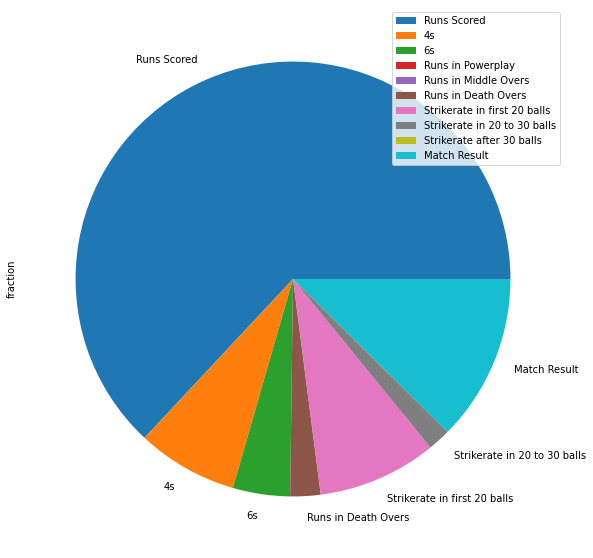

In [20]:
weights(adjust_data(data))

### Now lets do the same analysis for top-order batsman since the requirement for top order batsman and middle order change 

#### First we need to separate the data. This can be done by using the batsman position. We are going to group top three batsman together

In [22]:
data=f_data.loc[(f_data['Balls Bowled']<6) & (f_data['Balls Faced']>10) & (f_data['Batting Position']<4) ][['Runs Scored', '4s', '6s','Runs in Powerplay', 'Runs in Middle Overs', 'Runs in Death Overs',
       'Strikerate in first 20 balls', 'Strikerate in 20 to 30 balls',
       'Strikerate after 30 balls','Match Result', 'Man of the match']]

[0.57031846 0.0916983  0.0580667  0.         0.         0.03900781
 0.04811977 0.03763121 0.         0.15515776]
Recall score is: 0.39452054794520547
Precision score is : 0.8181818181818182


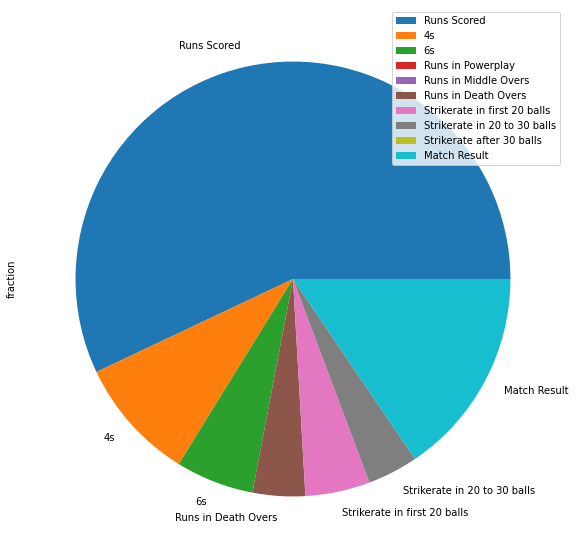

In [23]:
weights(adjust_data(data))

## Middle order batsman

In [24]:
data=f_data.loc[(f_data['Balls Bowled']<6) & (f_data['Balls Faced']>10) & (f_data['Batting Position']<8) & (f_data['Batting Position']>3)][['Runs Scored',  '4s', '6s','Runs in Middle Overs', 'Runs in Death Overs',
       'Strikerate in first 20 balls', 'Strikerate in 20 to 30 balls',
       'Strikerate after 30 balls', 'Match Result','Man of the match']]

[0.09247634 0.20815851 0.05978292 0.13781154 0.         0.18204753
 0.07936464 0.12585598 0.11450254]
Recall score is: 0.21951219512195122
Precision score is : 0.75


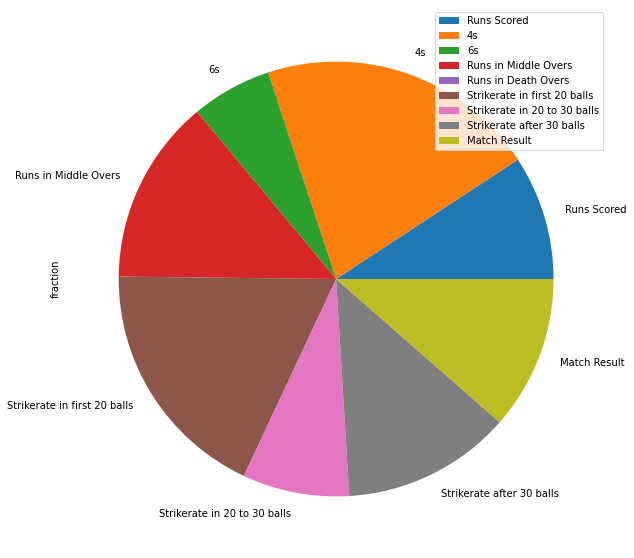

In [25]:
weights(adjust_data(data))

### Lets now try without the match result column and removing runs column 

In [184]:
data=t_data[[ '4s', '6s','Runs in Powerplay', 'Runs in Middle Overs', 'Runs in Death Overs',
       'Strikerate in first 20 balls', 'Strikerate in 20 to 30 balls',
       'Strikerate after 30 balls','Man of the match']]

<ipython-input-185-f004ebbd87d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weights(adjust_data(data))
<ipython-input-166-cef06e7cb818>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col]=(data[col]-miner)/(maxer-miner)-0.5
<ipython-input-166-cef06e7cb818>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data

[0.3693732  0.31554518 0.06980522 0.13145138 0.10024609 0.01357893
 0.         0.        ]


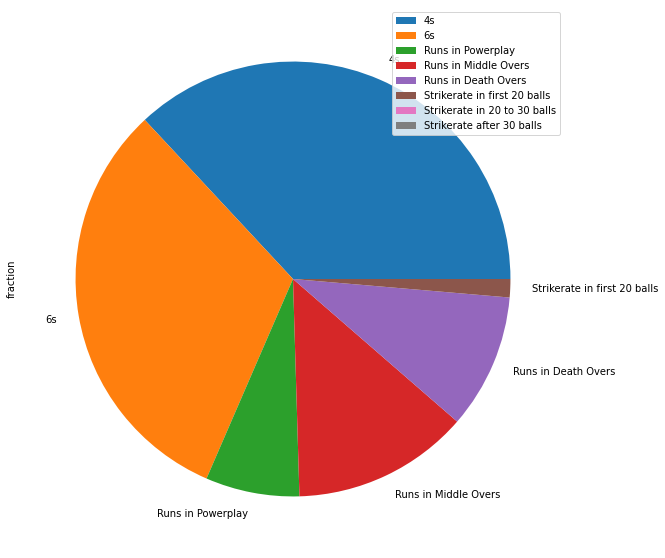

In [185]:
weights(adjust_data(data))

In [186]:
data=f_data.loc[(f_data['Balls Bowled']<6) & (f_data['Balls Faced']>10) & (f_data['Batting Position']<4) ][[ '4s', '6s','Runs in Powerplay', 'Runs in Middle Overs', 'Runs in Death Overs',
       'Strikerate in first 20 balls', 'Strikerate in 20 to 30 balls',
       'Strikerate after 30 balls','Match Result', 'Man of the match']]

[0.35135261 0.26856129 0.         0.14137079 0.06977147 0.
 0.         0.00601106 0.16293278]


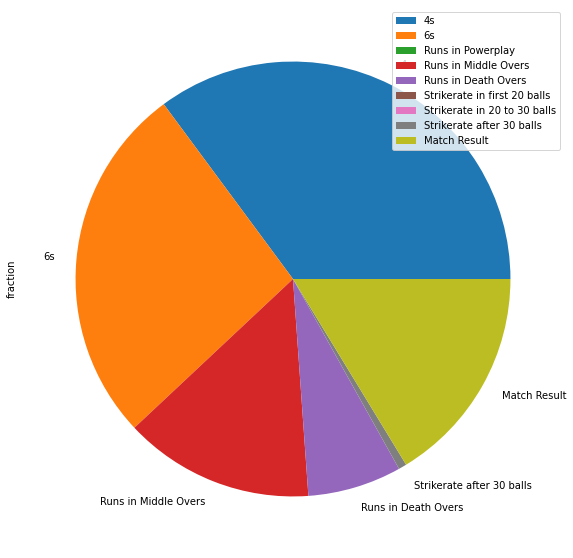

In [187]:
weights(adjust_data(data))

### Now we will try different kind of fitting where instead of using all the data we use fraction of data where the number of positive samples are high

In [75]:
pos_samples=data.loc[(data['Man of the match']==1)]
neg_samples=data.loc[(data['Man of the match']!=1)]
eps=1e-2
pos_neg_ratio=0.5
pos_sample_ratio=0.99
weights=np.zeros((10,1))
max_steps=200
counter=0
func=np.ascontiguousarray
clf=noneg_driftsvm()
recall_values=[]
adj_s=adjust_data(data1)
X=adj_s.drop(['Man of the match'],axis=1).to_numpy()
y=adj_s['Man of the match'].to_numpy()

In [76]:
while True:
    if counter==max_steps:
        break
    counter+=1
    
    s1=pos_samples.sample(n=int(pos_samples.shape[0]*pos_sample_ratio))
    s2=neg_samples.sample(n=int(pos_samples.shape[0]*pos_sample_ratio/pos_neg_ratio))
    data1=pd.concat([s1,s2])
    data1=adjust_data(data1)
    #print('hello')
    X_data=data1.drop(['Man of the match'],axis=1).to_numpy()
    y_data=data1['Man of the match'].to_numpy()
    clf.fit(X=func(X_data),y=func(y_data))
    
    y_pred=clf.predict(X)
        
    recall_values.append(metrics.recall_score(y,y_pred))
    temp_weights=clf.beta
    #temp_weights=temp_weights/np.linalg.norm(temp_weights)
    
    if np.linalg.norm(temp_weights-weights,ord=2)<eps:
        print('Threshold reached at counter=',counter)
        break
    weights=temp_weights
    
    

Threshold reached at counter= 189


In [78]:
weights/np.sum(weights)

array([0.73482046, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.26517954])

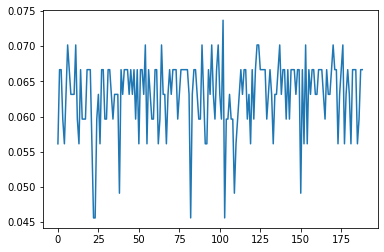

In [77]:
plt.plot(range(counter),recall_values)